In [ ]:
# Authors: Isabella Silva Ferreira and Micael Veríssimo de Araújo
# e-mails: (is_bella21@hotmail.com)    (micaelvero@hotmail.com)


In [1]:
# Read data File and sapare the all the sets
import os
import pickle
import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn.externals import joblib


from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 
import random

print "All Right!"

All Right!


Using Theano backend.


In [2]:
# Confirm our array shape
path = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/DataFiles"
data = np.load(path+"/"+"lvbb125Array.npy")
data_target = data[:,[12]]

data_inputs = data[:,:12]
print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [3]:
print data_inputs.shape
data_inputs

(191100, 12)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
         -1.83297706e+00,   9.21870469e+01,   5.98104895e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.78017831e+00,   1.07602320e+02,   5.98104895e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          5.18436611e-01,   3.70010500e+02,   4.97765697e+01],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
         -2.27387905e+00,   3.86259570e+01,   3.57536859e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
         -1.46886933e+00,   1.07292875e+02,   5.50991584e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
         -3.02542996e+00,   6.82103906e+01,   5.50991584e+01]])

In [4]:
print data_target.shape
data_target

(191100, 1)


array([[  61.01959766],
       [  64.46546875],
       [ 106.72465625],
       ..., 
       [  33.90225391],
       [  96.8779375 ],
       [  53.51172656]])

In [5]:
# Train NN
#from Functions import LogFunctions as log
from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 
import random


# Train information 
n_folds = 2
n_inits = 1
norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}

# Slip the train and test sets
test_id= random.sample(range(data_inputs.shape[0]),int(np.floor(0.1*data_target.shape[0])))
lista_id = np.asarray(range(0, data_inputs.shape[0]))
all_id = np.ndarray.tolist(lista_id)
train_id = list(set(lista_id) - set(test_id))

                           

for ifold in range(0,9):
#    train_id, test_id = CVO[ifold]
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    norm_all_data = scaler.transform(data_inputs)
    
# Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id],
             bins=np.linspace(data_target[train_id].min(),data_target[train_id].max(),50))

    MOP = target_values[np.argmax(freq)]
    
    norm_target = data_target/MOP

    print 'Train Process for %i Fold'%(ifold+1)
    
    best_init = 0
    best_loss = 999
    
    for i_init in range(0,9):
        #print 'Init: %i of %i'%(i_init,train_info['n_inits'])
        model = Sequential()
        model.add(Dense(30, input_dim=data_inputs.shape[1], init='uniform'))
        model.add(Activation('tanh'))
        model.add(Dense(data_target.shape[1], init='uniform')) 
        model.add(Activation('linear'))
        
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='mean_squared_error', optimizer=sgd
                      ,metrics=['accuracy'])

        # Train model
        earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, 
                                            verbose=0, mode='auto')
        modelCheckPoint = callbacks.ModelCheckpoint(path+"/"+"Modelv3.h5", monitor='val_loss',
                                                    verbose=0, save_best_only=True, mode='auto')
        #start_time = time.time()
        init_trn_desc = model.fit(norm_all_data[train_id], norm_target[train_id], 
                                nb_epoch=500, 
                                batch_size=8,
                                callbacks=[earlyStopping, modelCheckPoint], 
                                verbose=0,
                                validation_data=(norm_all_data[test_id],norm_target[test_id]),
                                shuffle=True)

        
    
    trn_desc[ifold] = init_trn_desc  


print "All Right!"

Train Process for 1 Fold
Train Process for 2 Fold
Train Process for 3 Fold
Train Process for 4 Fold
Train Process for 5 Fold
Train Process for 6 Fold
Train Process for 7 Fold
Train Process for 8 Fold
Train Process for 9 Fold
All Right!


In [6]:
NN_output = model.predict(norm_all_data, batch_size=8, verbose=0)

print NN_output

[[ 1.33441174]
 [ 1.28176606]
 [ 2.24397492]
 ..., 
 [ 0.8564353 ]
 [ 2.29824805]
 [ 1.26512039]]


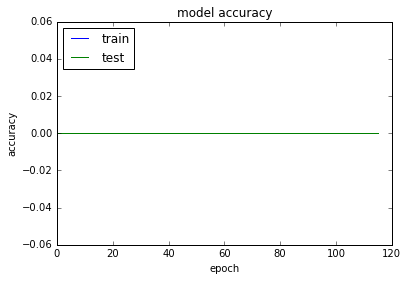

In [10]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

plt.plot(init_trn_desc.history['acc'])
plt.plot(init_trn_desc.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

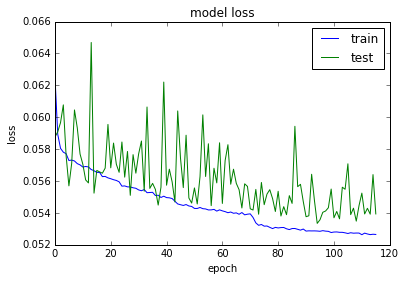

In [11]:
%matplotlib inline
plt.plot(init_trn_desc.history['loss'])
plt.plot(init_trn_desc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

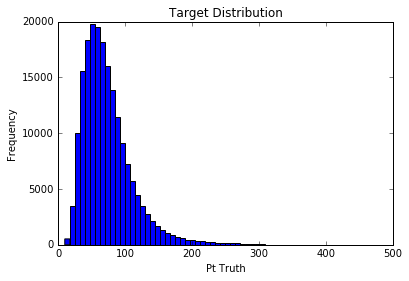

In [12]:
%matplotlib inline
plt.hist(data_target, 60)
plt.title("Target Distribution")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

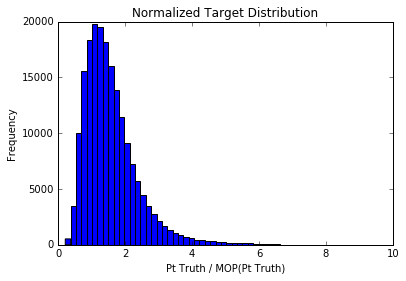

In [13]:
%matplotlib inline
plt.hist(norm_target, 60)
plt.title("Normalized Target Distribution")
plt.xlabel("Pt Truth / MOP(Pt Truth)")
plt.ylabel("Frequency")
plt.show()

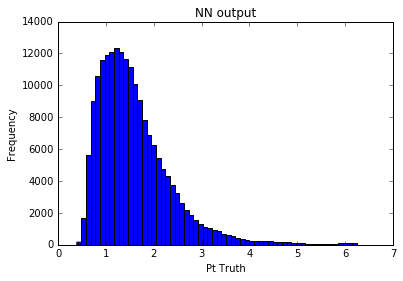

In [14]:
%matplotlib inline
plt.hist(NN_output, 60)
plt.title("NN output")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

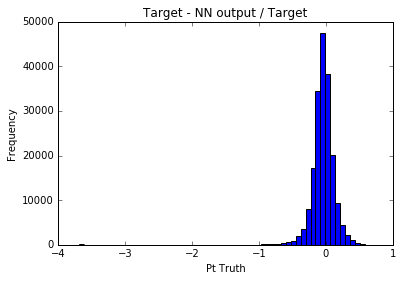

In [15]:
%matplotlib inline
plt.hist((norm_target - NN_output)/norm_target, 60)
plt.title("Target - NN output / Target")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Train NN
#from Functions import LogFunctions as log
from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 


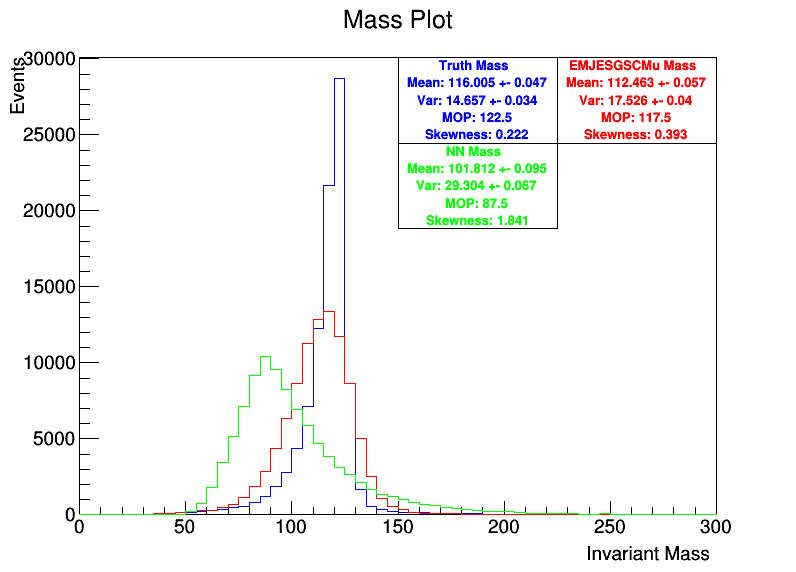

In [1]:
# Apply the correction for each jet

import ROOT
import copy
#from NeuralNetwork import MultiLayerPerceptron as mlp
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes
import numpy as np
import matplotlib.pyplot as plt


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)
#print "Everthing Ok"

output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/Plots"

input_Cor = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/DataFiles"

CorFac = np.load(input_Cor+"/"+"CorFactors.npy")

data_input = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet/lvbb125.root"
treeName = "perevent"

file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)

#nrEvents = tree.GetEntries()
nrEvents = 4

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
list_color.append(ROOT.kGreen)
    #list_color.append(ROOT.kRed+2)
    #list_color.append(ROOT.kRed+3)
    #list_color.append(ROOT.kRed+4)
    #end list of colors

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Mass ","h_lvbb_M_truth",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMu Mass ","h_lvbb_M_reco",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("NN Mass ","h_lvbb_M_NN",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)



c = rootnotes.canvas("c", (800, 600))
#h = ROOT.TH1F("Mass","Mass Distribution",60,0,300)

Corrections = ["GENWZ","EMJESGSCMu"]
for (j,Correction) in enumerate(Corrections):   
    for (i,entry) in enumerate(tree):
        if Correction == "GENWZ":
            list_hist_M[0].Fill(getattr(entry,"j1j2_"+Correction+"_M"))
        else:
            list_hist_M[1].Fill(getattr(entry,"j1j2_"+Correction+"_M"))
        
    for ((i,entry),k) in zip(enumerate(tree),range(CorFac.shape[0])):
        if Correction == "GENWZ":
            continue
        else:
        
        #list_hist_M[0].Fill(getattr(entry,"j1j2_GENWZ_M"))
        #list_hist_M[1].Fill(getattr(entry,"j1j2_"+Correction+"_M"))
            if i==k:
                Pt1_cor = CorFac.item(i)
                Pt2_cor = CorFac.item(i + 1)
                
                j1_LV = ROOT.TLorentzVector()
                j2_LV = ROOT.TLorentzVector()
            
                E1 = getattr(entry,"j1_"+Correction+"_E")
                Eta1 = getattr(entry,"j1_"+Correction+"_Eta")
                Phi1 = getattr(entry,"j1_"+Correction+"_Phi")
                Pt1 = getattr(entry,"j1_"+Correction+"_Pt")
            
                E2 = getattr(entry,"j2_"+Correction+"_E")
                Eta2 = getattr(entry,"j2_"+Correction+"_Eta")
                Phi2 = getattr(entry,"j2_"+Correction+"_Phi")
                Pt2 = getattr(entry,"j2_"+Correction+"_Pt")
        
                E1_cor = (CorFac.item(k)/Pt1)*E1
                E2_cor = (CorFac.item(k + 1)/Pt2)*E2
            
                j1_LV.SetPtEtaPhiE(Pt1_cor,Eta1,Phi1,E1_cor)
                j2_LV.SetPtEtaPhiE(Pt2_cor,Eta2,Phi2,E2_cor)
            
                dijet_LV = j1_LV + j2_LV
            
                Mass = dijet_LV.M()
                list_hist_M[2].Fill(Mass)
            
    
            else:
                Pt1_cor = CorFac.item(2*i + 1)
                Pt2_cor = CorFac.item(2*i + 2)
                
                j1_LV = ROOT.TLorentzVector()
                j2_LV = ROOT.TLorentzVector()
            
                E1 = getattr(entry,"j1_"+Correction+"_E")
                Eta1 = getattr(entry,"j1_"+Correction+"_Eta")
                Phi1 = getattr(entry,"j1_"+Correction+"_Phi")
                Pt1 = getattr(entry,"j1_"+Correction+"_Pt")
            
                E2 = getattr(entry,"j2_"+Correction+"_E")
                Eta2 = getattr(entry,"j2_"+Correction+"_Eta")
                Phi2 = getattr(entry,"j2_"+Correction+"_Phi")
                Pt2 = getattr(entry,"j2_"+Correction+"_Pt")
        
                E1_cor = (CorFac.item(k)/Pt1)*E1
                E2_cor = (CorFac.item(k + 1)/Pt2)*E2
            
                j1_LV.SetPtEtaPhiE(Pt1_cor,Eta1,Phi1,E1_cor)
                j2_LV.SetPtEtaPhiE(Pt2_cor,Eta2,Phi2,E2_cor)
            
                dijet_LV = j1_LV + j2_LV
            
                Mass = dijet_LV.M()
                list_hist_M[0].Fill(Mass)
                
            
clone_list_M = []
for hist in list_hist_M:
    newhist = hist.Clone()
    clone_list_M.append(newhist)

HistogramFunctions.Draw1DHists(list_hist_M,output)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Mass Plot", " Invariant Mass ", "Events", c)        

c


In [ ]:
E1 = getattr(entry,"j1_"+Correction+"_E")